# ML - Homework 1

***

## Problem 1

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function definition

# Compute probability of being bigger than epsilon given multiple epsilons.
# Returns a list
def comp_probs (mean_est, epsilon):
    probs= [(np.sum(np.abs(mean_est)>eps)/len(mean_est)) for eps in epsilon]
    return probs

# Compute median of means given the number of blocks.
# Returns a list of medians of means
def comp_mom (X,n_blocks):
    means = [np.mean(block,axis=1) for block in np.split(X,n_blocks,axis=1)]
    return np.median(means,axis=0)

### Gaussian distribution

Experimenting with n iid gaussian distributed variables. Comparison between different mean estimators.

Let's first check how the mean estimator compares to the true distribution.

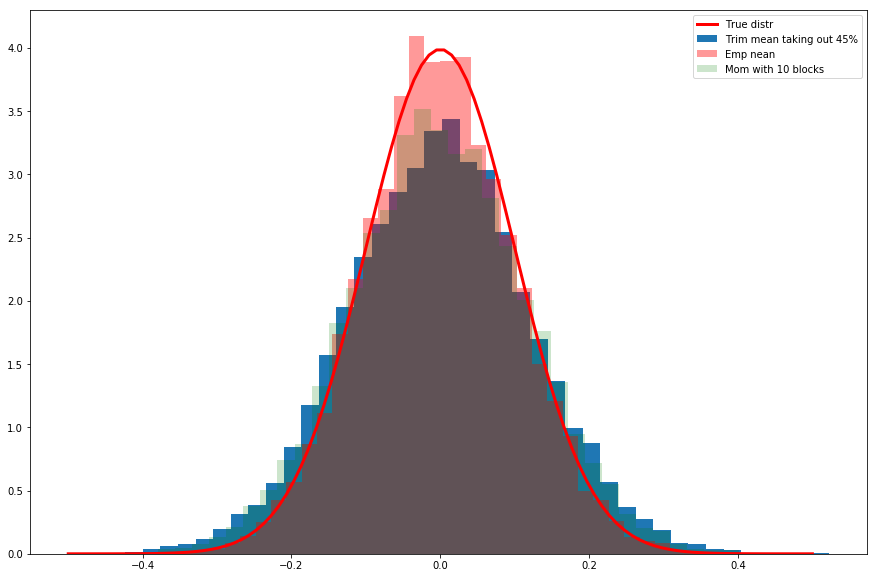

In [3]:
# Example for 100 variables
N=100
k=10000
np.random.seed(42)
X = np.random.randn(k,N)

fig,ax = plt.subplots(1,1,figsize=(15,10))

trim_mean = stats.trim_mean(X,0.45,axis=1)
plt.hist(trim_mean, bins=40,density = True)

emp_mean = np.mean(X,axis=1)
plt.hist(emp_mean, bins = 40,alpha = 0.4, color='red',density = True)

mom = comp_mom(X,10)
plt.hist(mom, bins = 40,alpha = 0.2, color='green',density = True)


a = np.linspace(-0.5,0.5,100)
plt.plot(a,stats.norm.pdf(a,loc=0,scale=1/np.sqrt(N)),color = 'red',lw=3)
plt.legend(["True distr","Trim mean taking out 45%", "Emp nean","Mom with 10 blocks"]);

Defining the number of variables and the different epsilons to check

In [4]:
n_vars = [10,100,1000]
epsilon = np.logspace(-3,0,100)
k=10000

Comparing the different estimators in different cases.

In [16]:
X = np.random.randn(k,int(n_var))
(np.mean(X, axis=1)).shape

(10000,)

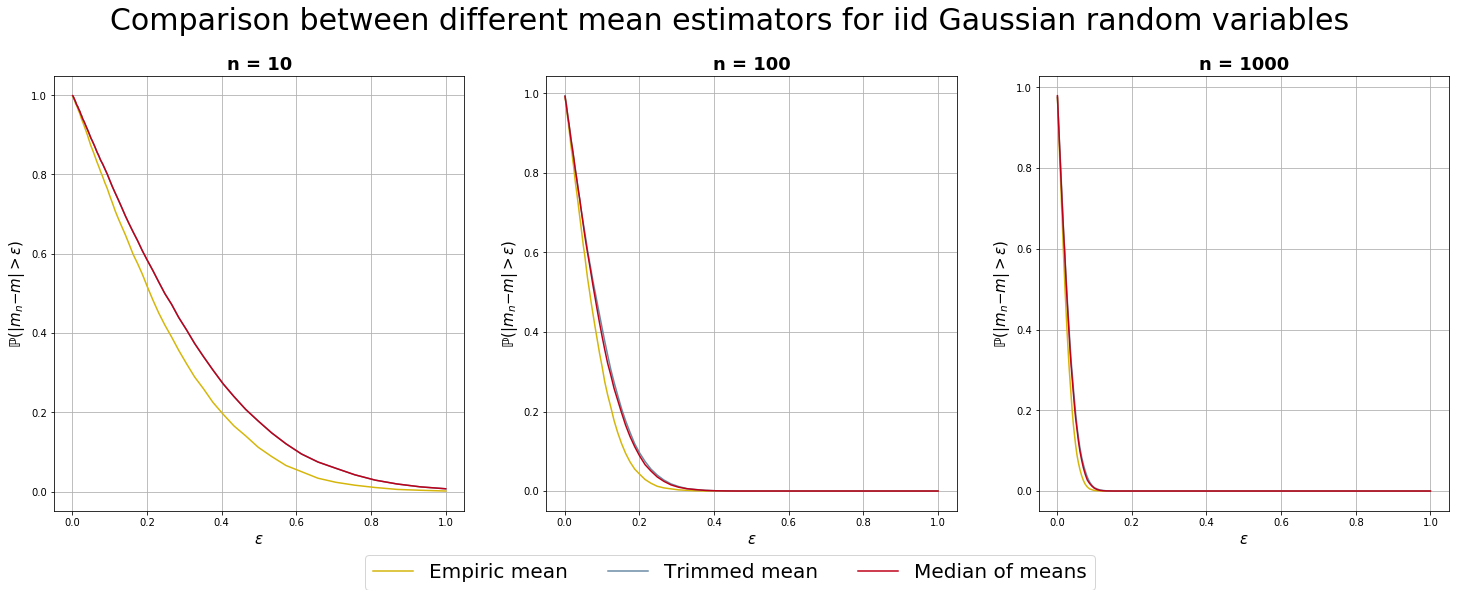

In [7]:
trim = 0.45
blocks = 10

fig,axes= plt.subplots(nrows = 1, ncols = 3, figsize = (25,8))

for ind,n_var in enumerate(n_vars):
    X = np.random.randn(k,int(n_var))
    
    emp_mean = np.mean(X,axis=1)
    axes[ind].plot(epsilon,comp_probs(emp_mean,epsilon),color = sns.xkcd_rgb["dark yellow"])
    
    trim_mean = stats.trim_mean(X,trim,axis =1)
    axes[ind].plot(epsilon,comp_probs(trim_mean,epsilon),color = sns.xkcd_rgb["grey blue"])
    
    mom = comp_mom(X,blocks)
    axes[ind].plot(epsilon,comp_probs(mom,epsilon),color = sns.xkcd_rgb["scarlet"]) 
    
    axes[ind].set_xlabel("$\epsilon$",fontsize=15)
    axes[ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
    axes[ind].grid(True)

axes[0].set_title("n = 10",fontsize = 18,fontweight = 1000)
axes[1].set_title("n = 100",fontsize = 18,fontweight = 1000)
axes[2].set_title("n = 1000",fontsize = 18,fontweight = 1000)

fig.legend(["Empiric mean","Trimmed mean","Median of means"],fontsize = 20,loc = (0.25,0),ncol = 3)

            
fig.suptitle("Comparison between different mean estimators for iid Gaussian random variables",fontsize = 30,y=1);

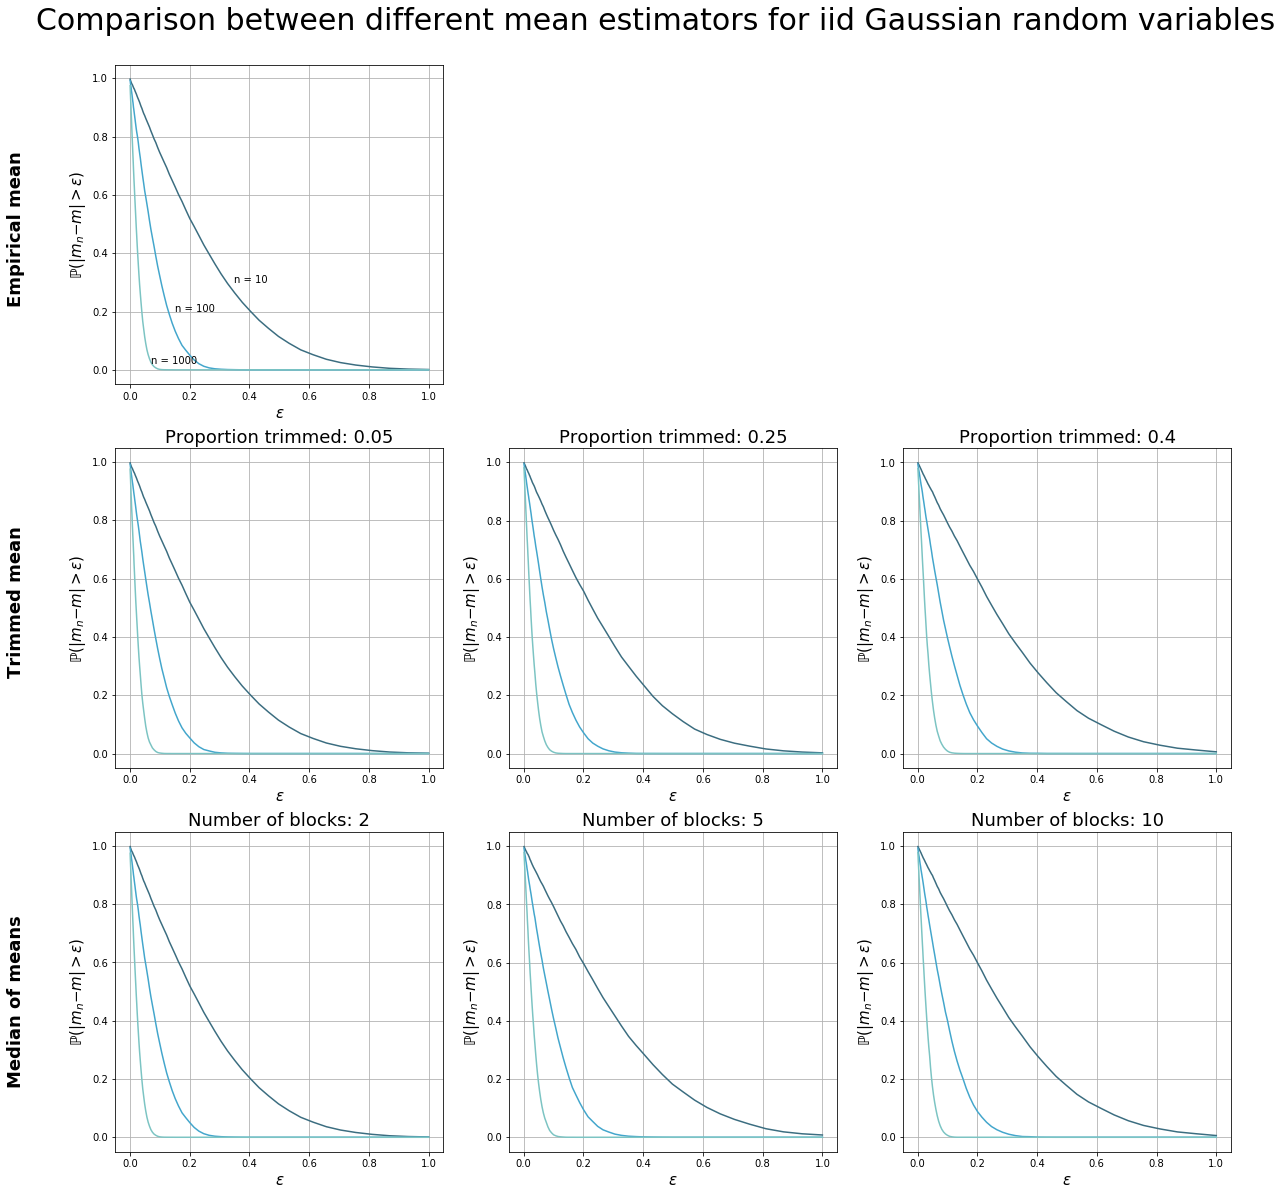

In [6]:
trim_props = [0.05,0.25,0.4]
mom_blocks = [2,5,10]

fig,axes= plt.subplots(nrows = 3, ncols = 3, figsize = (20,20))

palette = sns.color_palette("GnBu_d", n_colors = len(n_vars))
for palette_ind,n_var in enumerate(n_vars):
    X = np.random.randn(k,int(n_var))
    
    # Empirical mean
    emp_mean = np.mean(X,axis=1)
    axes[0,0].plot(epsilon,comp_probs(emp_mean,epsilon),color = palette[palette_ind])
    axes[0,0].grid(True)
    axes[0,0].set_xlabel("$\epsilon$",fontsize=15)
    axes[0,0].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    axes[0,1].set_visible(False)
    axes[0,2].set_visible(False)
    
    # Trimmed mean
    
    for ind,trims in enumerate(trim_props):
        trim_mean = stats.trim_mean(X,trims,axis =1)
        axes[1,ind].plot(epsilon,comp_probs(trim_mean,epsilon),color = palette[palette_ind])
        axes[1,ind].grid(True)
        axes[1,ind].set_title("Proportion trimmed: " + str(trims),fontsize = 18)
        axes[1,ind].set_xlabel("$\epsilon$",fontsize=15)
        axes[1,ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
    # Median of means
    
    for ind,block in enumerate(mom_blocks):    
        mom = comp_mom(X,block)
        axes[2,ind].plot(epsilon,comp_probs(mom,epsilon),color = palette[palette_ind]) 
        axes[2,ind].grid(True)
        axes[2,ind].set_title("Number of blocks: " + str(block),fontsize=18)
        axes[2,ind].set_xlabel("$\epsilon$",fontsize=15)
        axes[2,ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
        

axes[0,0].annotate("n = 10", (0.35,0.3))
axes[0,0].annotate("n = 100", (0.15,0.2))
axes[0,0].annotate("n = 1000", (0.07,0.02))

fig.text(0.05,0.81,"Empirical mean",fontsize = 18,fontweight = 1000, rotation = 90)
fig.text(0.05,0.55,"Trimmed mean",fontsize = 18,fontweight = 1000, rotation = 90)
fig.text(0.05,0.28,"Median of means",fontsize = 18,fontweight = 1000, rotation = 90)
fig.suptitle("Comparison between different mean estimators for iid Gaussian random variables",fontsize = 30,y=0.92);

### Student's distribution

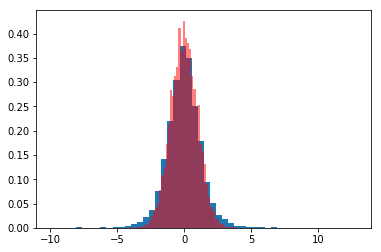

In [26]:
X = np.random.standard_t(df=5,size=k)
Y = np.random.standard_normal(size=k)

plt.hist(X,bins=50,density = True)
plt.hist(Y,bins=50,alpha = 0.5, color="red",density=True);

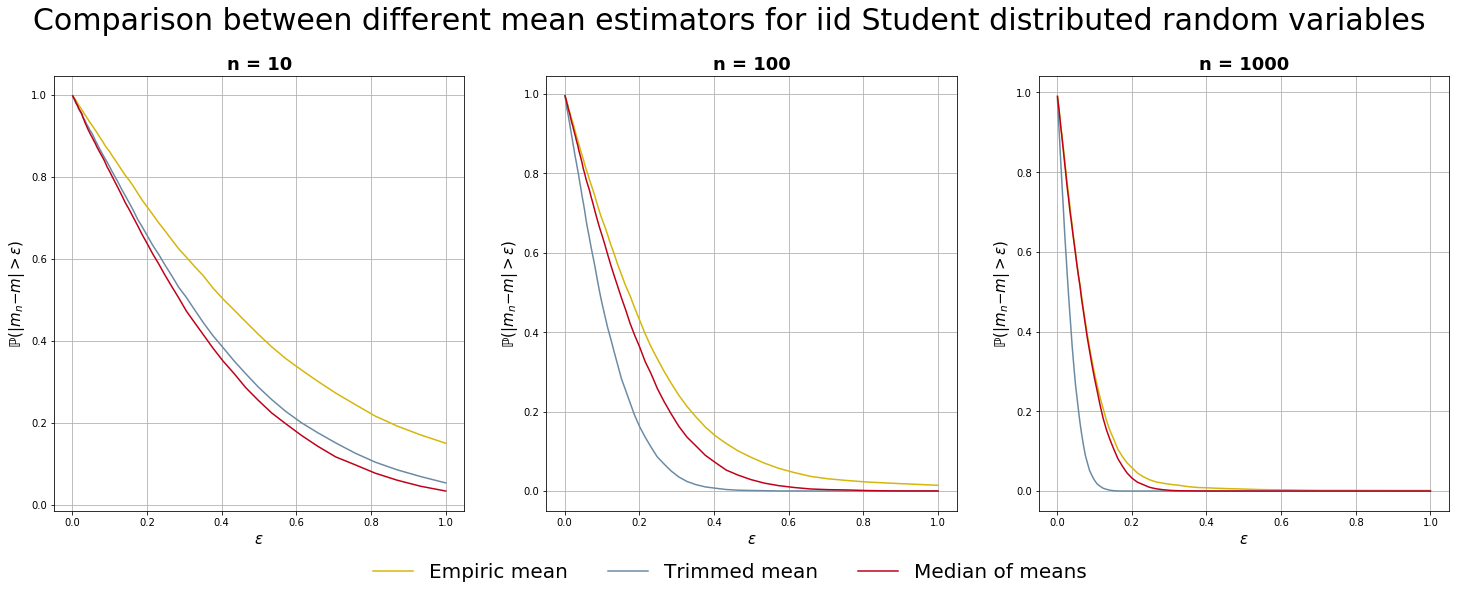

In [28]:
trim = 0.1
blocks = 10
n_vars = [10,100,1000]
df = 2

fig,axes= plt.subplots(nrows = 1, ncols = 3, figsize = (25,8))
np.random.seed(42)

for ind,n_var in enumerate(n_vars):
    X = np.reshape(np.random.standard_t(df=df,size=k*n_var),(k,n_var))
    
    emp_mean = np.mean(X,axis=1)
    axes[ind].plot(epsilon,comp_probs(emp_mean,epsilon),color = sns.xkcd_rgb["dark yellow"])
    
    trim_mean = stats.trim_mean(X,trim,axis =1)
    axes[ind].plot(epsilon,comp_probs(trim_mean,epsilon),color = sns.xkcd_rgb["grey blue"])
    
    mom = comp_mom(X,blocks)
    axes[ind].plot(epsilon,comp_probs(mom,epsilon),color = sns.xkcd_rgb["scarlet"]) 
    
    axes[ind].set_xlabel("$\epsilon$",fontsize=15)
    axes[ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
    axes[ind].grid(True)

axes[0].set_title("n = 10",fontsize = 18,fontweight = 1000)
axes[1].set_title("n = 100",fontsize = 18,fontweight = 1000)
axes[2].set_title("n = 1000",fontsize = 18,fontweight = 1000)

fig.legend(["Empiric mean","Trimmed mean","Median of means"],fontsize = 20,loc = (0.25,0),ncol = 3,frameon=False)

            
fig.suptitle("Comparison between different mean estimators for iid Student distributed random variables",fontsize = 30,y=1);

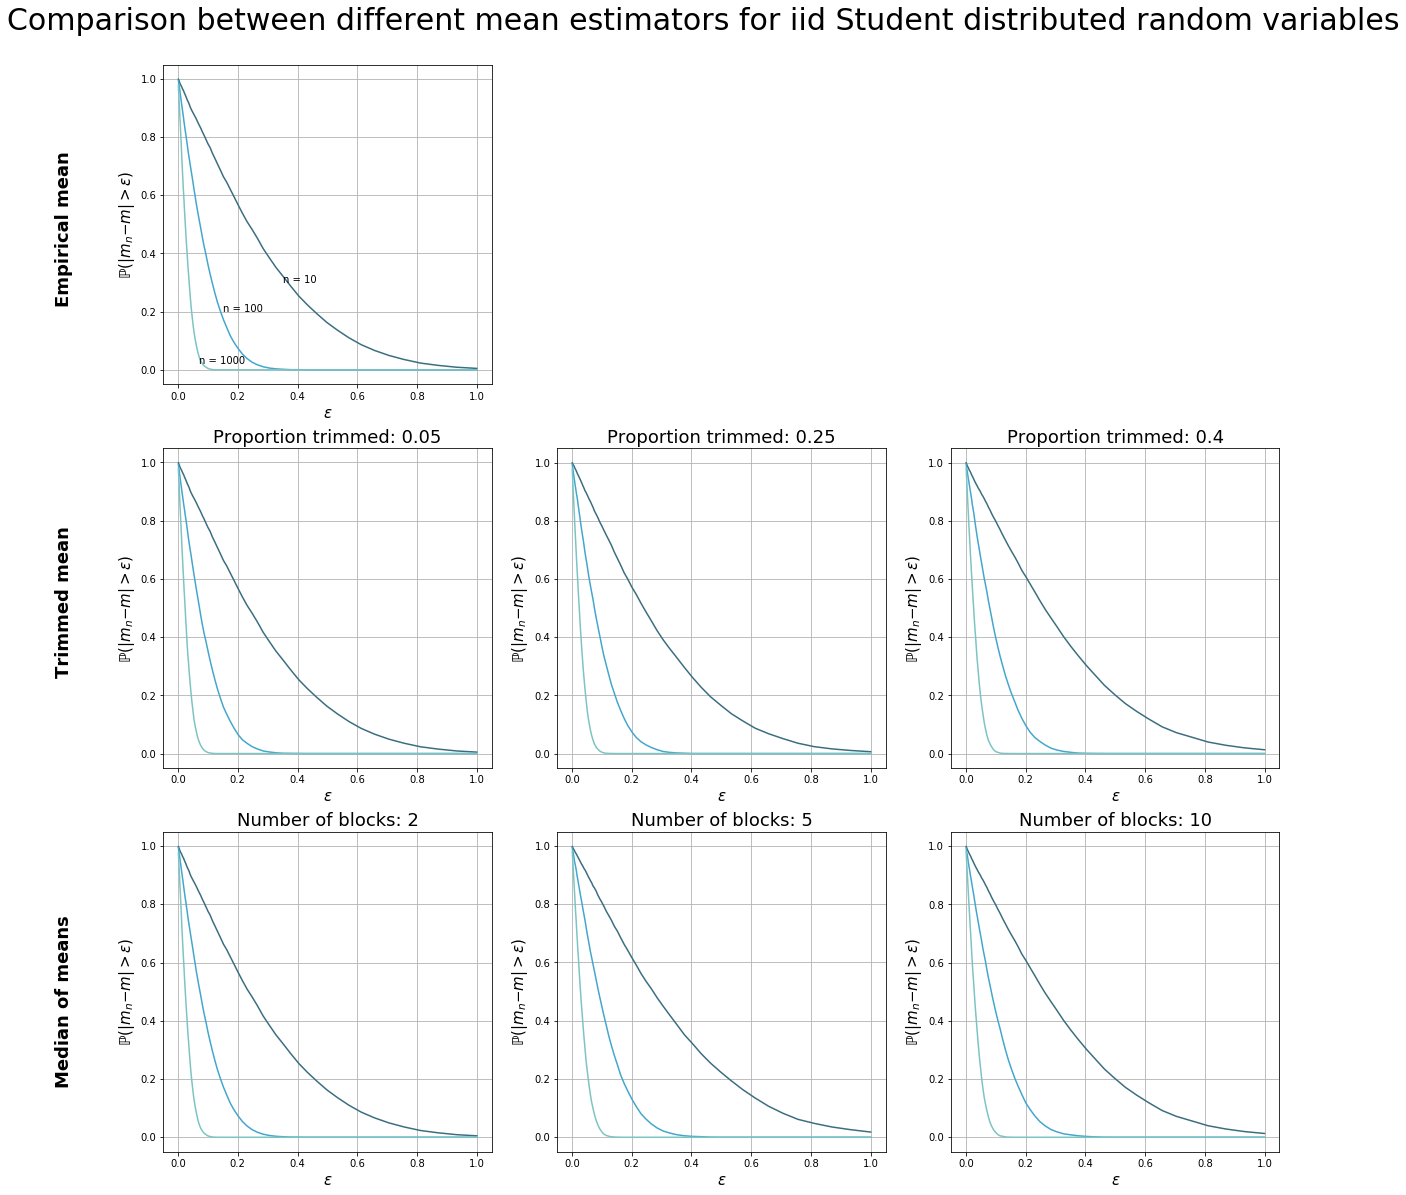

In [9]:
trim_props = [0.05,0.25,0.4]
mom_blocks = [2,5,10]
n_vars = [10,100,1000]
k=10000
df = 10

fig,axes= plt.subplots(nrows = 3, ncols = 3, figsize = (20,20))

palette = sns.color_palette("GnBu_d", n_colors = len(n_vars))
for palette_ind,n_var in enumerate(n_vars):
    X = np.reshape(np.random.standard_t(df=df,size=k*n_var),(k,n_var))
    
    # Empirical mean
    emp_mean = np.mean(X,axis=1)
    axes[0,0].plot(epsilon,comp_probs(emp_mean,epsilon),color = palette[palette_ind])
    axes[0,0].grid(True)
    axes[0,0].set_xlabel("$\epsilon$",fontsize=15)
    axes[0,0].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    axes[0,1].set_visible(False)
    axes[0,2].set_visible(False)
    
    # Trimmed mean
    
    for ind,trims in enumerate(trim_props):
        trim_mean = stats.trim_mean(X,trims,axis =1)
        axes[1,ind].plot(epsilon,comp_probs(trim_mean,epsilon),color = palette[palette_ind])
        axes[1,ind].grid(True)
        axes[1,ind].set_title("Proportion trimmed: " + str(trims),fontsize = 18)
        axes[1,ind].set_xlabel("$\epsilon$",fontsize=15)
        axes[1,ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
    # Median of means
    
    for ind,block in enumerate(mom_blocks):    
        mom = comp_mom(X,block)
        axes[2,ind].plot(epsilon,comp_probs(mom,epsilon),color = palette[palette_ind]) 
        axes[2,ind].grid(True)
        axes[2,ind].set_title("Number of blocks: " + str(block),fontsize=18)
        axes[2,ind].set_xlabel("$\epsilon$",fontsize=15)
        axes[2,ind].set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
        

axes[0,0].annotate("n = 10", (0.35,0.3))
axes[0,0].annotate("n = 100", (0.15,0.2))
axes[0,0].annotate("n = 1000", (0.07,0.02))

fig.text(0.05,0.81,"Empirical mean",fontsize = 18,fontweight = 1000, rotation = 90)
fig.text(0.05,0.55,"Trimmed mean",fontsize = 18,fontweight = 1000, rotation = 90)
fig.text(0.05,0.28,"Median of means",fontsize = 18,fontweight = 1000, rotation = 90)
fig.suptitle("Comparison between different mean estimators for iid Student distributed random variables",fontsize = 30,y=0.92);

## Problem 2

In [10]:
import sklearn.preprocessing as skprep

/home/jrd/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


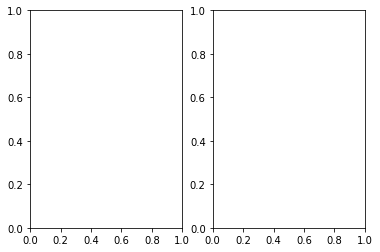

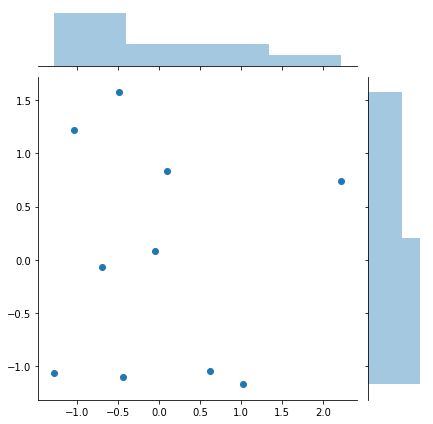

In [29]:
n=10

stan_basis = np.identity(n)
np.random.seed(41)
W = np.random.randn(n,2)

proj = stan_basis@W

scaler = skprep.StandardScaler()
scaled = scaler.fit_transform(proj)

r_points = np.random.randn(n,2)

fig,axes = plt.subplots(nrows=1,ncols=2)

sns.jointplot(scaled[:,0], scaled[:,1],kind = 'scatter')
# sns.jointplot(r_points[:,0], r_points[:,1],kind = 'scatter',ax = axes[1])